No. of times optimal bandit was pulled 9918
Q values [0.40296401 0.39285714 0.38461538 0.38709677]


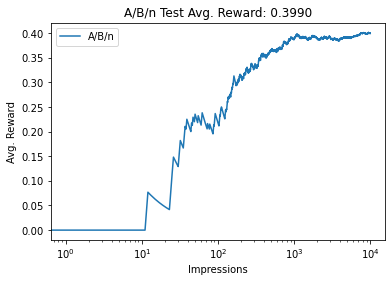

In [1]:
# Optimistic initial values in code

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class BernoulliBandit(object):
    def __init__(self, p):
        self.p = p
    
    def display_ad(self):
        reward = np.random.binomial(n=1, p=self.p)
        return reward
    
bandit_probs = [0.4, 0.016, 0.02, 0.028, 0.031] #These probabilities represent the reward distribution per each bandit (ad here).

ads = [BernoulliBandit(i) for i in bandit_probs]

n_trails = 10000
n_ads = len(ads)

n_optimal_pulls = 0
Q = np.array([10., 10., 10., 10.])  # Intializing bandit probs to a very high value
N = np.ones(n_ads)  # N, total impressions
total_reward = 0
avg_rewards = []  # Save average rewards over time

for i in range(n_trails):
    ad_chosen = np.argmax(Q)

    if ad_chosen == np.argmax(bandit_probs):
            n_optimal_pulls +=1

    R = ads[ad_chosen].display_ad()  # Observe reward
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / (i + 1)
    avg_rewards.append(avg_reward_so_far)

best_ad_index = np.argmax(Q)  # Find the best action
print("No. of times optimal bandit was pulled", n_optimal_pulls)
print("Q values", Q)


df_reward_comparison = pd.DataFrame(avg_rewards, columns=['A/B/n'])
df_reward_comparison['A/B/n'].plot(title="A/B/n Test Avg. Reward: {:.4f}"
                                .format(avg_reward_so_far))
plt.xlabel("Impressions")
plt.ylabel("Avg. Reward")
plt.xscale('log')
plt.legend()
plt.show()